In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
file_path = r"temp_datalab_records_linkedin_company.csv"
df = pd.read_csv(file_path)


/Users/dhairya/Desktop/Anaconda/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['as_of_date'] = pd.to_datetime(df['as_of_date'], infer_datetime_format=True)
df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True)

df_old = df.copy()
print(df_old.shape)
df.drop_duplicates(subset ="company_name", 
                     keep = 'last', inplace = True)


(2426196, 14)


In [4]:
df_ind = df.dropna(subset=['industry'])

x = df_ind['industry'].values
y = df_ind['employees_on_platform'].values
z = df_ind['followers_count'].values

unq_x, unq_idx, unq_inv = np.unique(x,return_index=True, return_inverse=True)

sortd_unqinv = np.array(sorted(unq_inv))


current = [sortd_unqinv]
used = []
dict_empl = {}
dict_fol = {}
for u_idx in unq_idx:
    dict_empl[x[u_idx]] = 0
    dict_fol[x[u_idx]] = 0

for c in sortd_unqinv:    
    if c not in used:
        dict_empl[x[c]] = dict_empl[x[c]] + y[c]
        dict_fol[x[c]] = dict_fol[x[c]] + z[c]        
    used.append(c)
    
ind = []
ind_f = []
num_emp = []
num_fol = []

for k, v in dict_empl.items():
    ind.append(k)
    num_emp.append(v)
    
for k1, v1 in dict_fol.items():
    ind_f.append(k1)
    num_fol.append(v1)

In [5]:
ind = np.array(ind)
num_emp = np.array(num_emp)

num_empl_idx = np.argsort(num_emp)
sorted_num_empl = num_emp[num_empl_idx]
sorted_ind = ind[num_empl_idx]
sorted_ind_idx = np.arange(sorted_ind.shape[0]).reshape(sorted_ind.shape)

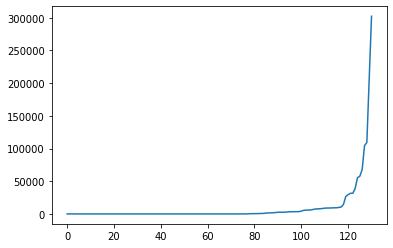

Industries with highest employees on LinkedIn:
['Retail' 'Financial Services' 'Consumer Goods' 'Telecommunications'
 'Information Technology and Services']

Industries with lowest employees on LinkedIn:
['Law Practice' 'Outsourcing/Offshoring' 'Online Media'
 'Nonprofit Organization Management' 'Newspapers']


In [6]:
plt.plot(sorted_ind_idx, sorted_num_empl)
plt.show()

print("Industries with highest employees on LinkedIn:\n{}" .format(sorted_ind[sorted_ind_idx[-5:]]))
print("\nIndustries with lowest employees on LinkedIn:\n{}" .format(sorted_ind[sorted_ind_idx[0:5]]))

In [7]:
ind_f = np.array(ind_f)
num_fol = np.array(num_fol)

num_fol_idx = np.argsort(num_fol)
sorted_num_fol = num_fol[num_fol_idx]
sorted_ind_f = ind_f[num_fol_idx]
sorted_ind_idx_f = np.arange(sorted_ind_f.shape[0]).reshape(sorted_ind_f.shape)

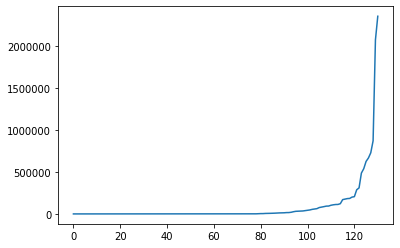

Industries with highest followers on LinkedIn:
['Retail' 'Financial Services' 'Consumer Goods' 'Telecommunications'
 'Information Technology and Services']

Industries with lowest followers on LinkedIn:
['Law Practice' 'Outsourcing/Offshoring' 'Online Media'
 'Nonprofit Organization Management' 'Newspapers']


In [8]:
plt.plot(sorted_ind_idx_f, sorted_num_fol)
plt.show()

print("Industries with highest followers on LinkedIn:\n{}" .format(sorted_ind[sorted_ind_idx[-5:]]))
print("\nIndustries with lowest followers on LinkedIn:\n{}" .format(sorted_ind[sorted_ind_idx[0:5]]))